## Tensor Flow Regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.style.use('seaborn-talk')

## Get Data

Kaggle data on historical pricing data for King County USA

In [8]:
df = pd.read_csv('kc_house_data.csv')

In [10]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## EDA

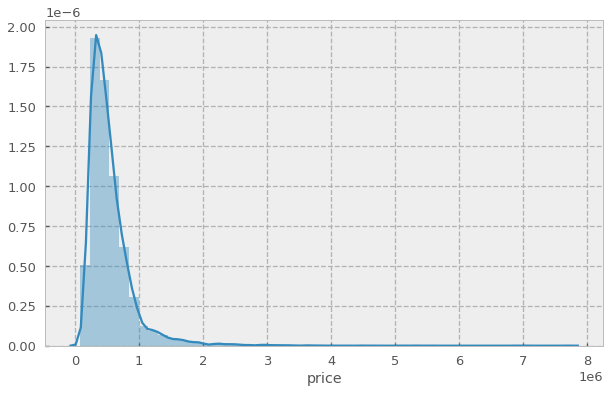

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

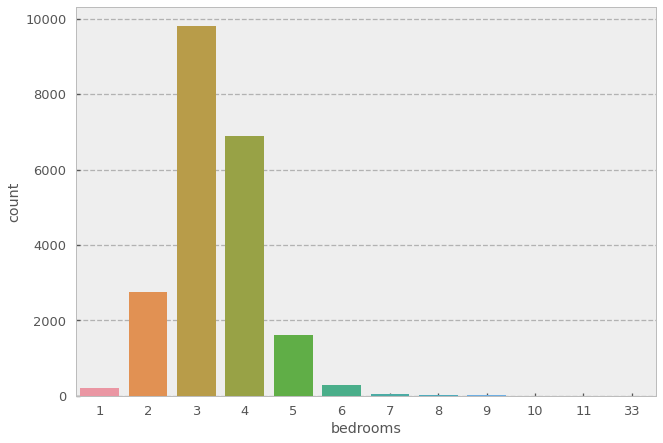

In [21]:
sns.countplot(df['bedrooms'])

In [24]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

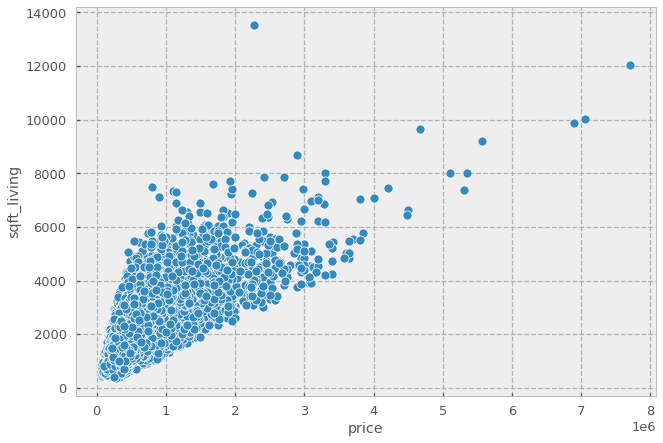

In [27]:
sns.scatterplot(x='price', y='sqft_living', data=df)

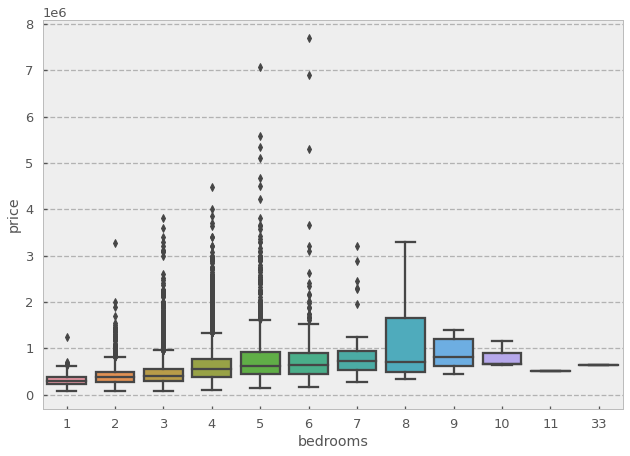

In [28]:
sns.boxplot(x='bedrooms', y='price', data=df)

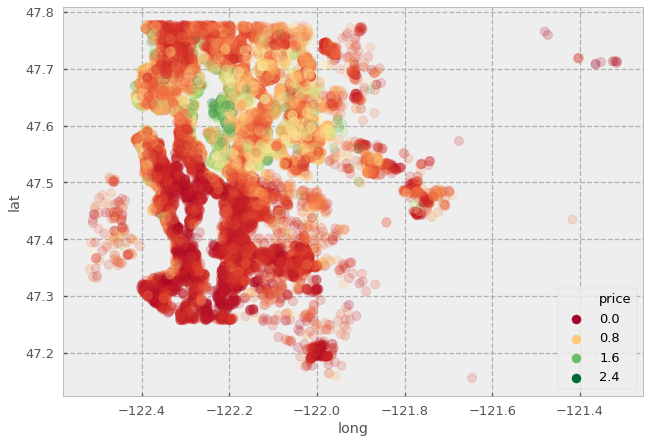

In [36]:
plot = df[df.price.between(df.price.quantile(.01), df.price.quantile(.99))]
sns.scatterplot(
    x='long', y='lat', data=plot, hue='price', alpha=0.2, edgecolor=None, palette='RdYlGn'
)

## Feature Engineering

In [37]:
df.drop('id', axis=1, inplace=True)

In [38]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [40]:
df.drop('date', axis=1, inplace=True)

In [41]:
df.drop('zipcode', axis=1, inplace=True)

In [42]:
df.head() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


# Train Model

In [43]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [53]:
model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    batch_size=128,
    epochs=400
)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 58us/sample - loss: 430242312105.5659 - val_loss: 418927117016.1778
Epoch 2/400
15117/15117 [==============================] - 0s 21us/sample - loss: 429207688481.3103 - val_loss: 415189488576.7901
Epoch 3/400
15117/15117 [==============================] - 0s 21us/sample - loss: 413475430552.2758 - val_loss: 378466003748.0296
Epoch 4/400
15117/15117 [==============================] - 0s 22us/sample - loss: 334446729661.5826 - val_loss: 252155521868.4839
Epoch 5/400
15117/15117 [==============================] - 0s 21us/sample - loss: 181821081704.5880 - val_loss: 113849785639.8222
Epoch 6/400
15117/15117 [==============================] - 0s 22us/sample - loss: 103664693866.5862 - val_loss: 95153575637.6494
Epoch 7/400
15117/15117 [==============================] - 0s 23us/sample - loss: 97575916846.7225 - val_loss: 93552303359.3679
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 21us/sample - loss: 38665730780.2511 - val_loss: 37511532124.2864
Epoch 65/400
15117/15117 [==============================] - 0s 16us/sample - loss: 38446299911.8746 - val_loss: 37139884487.1111
Epoch 66/400
15117/15117 [==============================] - 0s 28us/sample - loss: 38195819713.5961 - val_loss: 36924040513.1062
Epoch 67/400
15117/15117 [==============================] - 0s 26us/sample - loss: 38050986815.7925 - val_loss: 36732623808.7901
Epoch 68/400
15117/15117 [==============================] - 0s 21us/sample - loss: 37810256569.0272 - val_loss: 36593219356.4444
Epoch 69/400
15117/15117 [==============================] - 0s 28us/sample - loss: 37658361444.6930 - val_loss: 36368046803.1210
Epoch 70/400
15117/15117 [==============================] - 0s 24us/sample - loss: 37460481271.0416 - val_loss: 36159241223.5852
Epoch 71/400
15117/15117 [==============================] - 0s 22us/sample - loss: 37335209791.8942 - val_loss

15117/15117 [==============================] - 0s 21us/sample - loss: 33167794068.0251 - val_loss: 31753261136.9086
Epoch 128/400
15117/15117 [==============================] - 0s 21us/sample - loss: 33089852159.0686 - val_loss: 31693484239.3284
Epoch 129/400
15117/15117 [==============================] - 0s 20us/sample - loss: 33069217343.0982 - val_loss: 31651099397.6889
Epoch 130/400
15117/15117 [==============================] - 0s 20us/sample - loss: 33008471393.3908 - val_loss: 31645813494.5185
Epoch 131/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33013312108.6184 - val_loss: 31554380104.6914
Epoch 132/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32937786477.2619 - val_loss: 31635189244.2074
Epoch 133/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32987461332.5967 - val_loss: 31493868804.4247
Epoch 134/400
15117/15117 [==============================] - 0s 22us/sample - loss: 32881158814.4738 - v

Epoch 190/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31556294804.0759 - val_loss: 29876972152.0988
Epoch 191/400
15117/15117 [==============================] - 0s 30us/sample - loss: 31510994834.5349 - val_loss: 29983061338.3901
Epoch 192/400
15117/15117 [==============================] - 0s 28us/sample - loss: 31516091677.7879 - val_loss: 29826647158.8346
Epoch 193/400
15117/15117 [==============================] - 0s 21us/sample - loss: 31514112987.3536 - val_loss: 29807707047.5062
Epoch 194/400
15117/15117 [==============================] - 0s 20us/sample - loss: 31495452738.5190 - val_loss: 29765942765.0370
Epoch 195/400
15117/15117 [==============================] - 0s 20us/sample - loss: 31454751308.3749 - val_loss: 29782570052.2667
Epoch 196/400
15117/15117 [==============================] - 0s 21us/sample - loss: 31438015399.1951 - val_loss: 29713911454.0247
Epoch 197/400
15117/15117 [==============================] - 0s 21us/sample - loss: 314176

15117/15117 [==============================] - 0s 21us/sample - loss: 30601951185.9380 - val_loss: 28793459658.9037
Epoch 254/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30599061739.7293 - val_loss: 28824016380.2074
Epoch 255/400
15117/15117 [==============================] - 1s 44us/sample - loss: 30645790176.3323 - val_loss: 28703920471.8617
Epoch 256/400
15117/15117 [==============================] - 0s 33us/sample - loss: 30601304684.4829 - val_loss: 28656110341.6889
Epoch 257/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30554105977.5903 - val_loss: 28663365075.7531
Epoch 258/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30536173180.4014 - val_loss: 28622873263.7235
Epoch 259/400
15117/15117 [==============================] - 0s 16us/sample - loss: 30733138407.3094 - val_loss: 28682578066.6469
Epoch 260/400
15117/15117 [==============================] - 0s 16us/sample - loss: 30538901385.4580 - v

15117/15117 [==============================] - 0s 17us/sample - loss: 29933112417.3400 - val_loss: 27886651720.6914
Epoch 317/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29929040848.7864 - val_loss: 27848025884.4444
Epoch 318/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29889235252.0738 - val_loss: 27906691284.3852
Epoch 319/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29883335235.5690 - val_loss: 27834733934.6173
Epoch 320/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29860528647.9593 - val_loss: 27772856188.5235
Epoch 321/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29866402870.3939 - val_loss: 27784465314.4494
Epoch 322/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29876070462.7257 - val_loss: 27795861923.7136
Epoch 323/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29844031843.4568 - v

15117/15117 [==============================] - 0s 17us/sample - loss: 29259978010.0623 - val_loss: 26975450200.4938
Epoch 380/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29234702389.3778 - val_loss: 26988297941.6494
Epoch 381/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29242159220.5099 - val_loss: 26952685057.2642
Epoch 382/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29212996008.5837 - val_loss: 26949962056.6914
Epoch 383/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29209312157.7117 - val_loss: 26944093388.8000
Epoch 384/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29215002974.7151 - val_loss: 27003214557.2346
Epoch 385/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29187556127.4475 - val_loss: 26922413533.8667
Epoch 386/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29182162981.7302 - v

In [55]:
loss = pd.DataFrame(model.history.history)

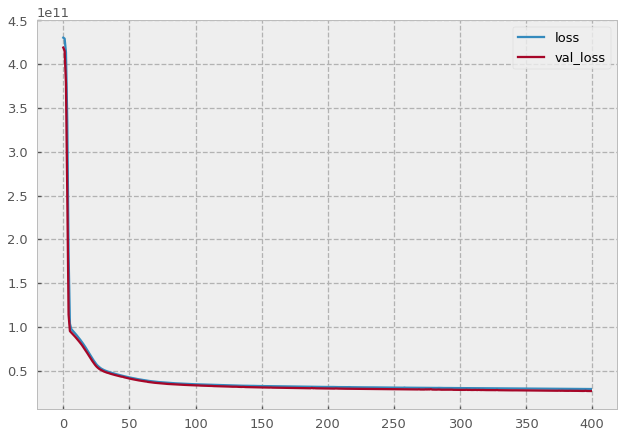

In [56]:
loss.plot() # model does not overfit

## Evaluate Model

In [61]:
from sklearn.metrics import mean_squared_error, explained_variance_score

In [58]:
pred = model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test,pred)) / y.mean() # Not great

0.30249797920773397

In [62]:
explained_variance_score(y_test, pred) #may not be as we thought

0.7985814804004353

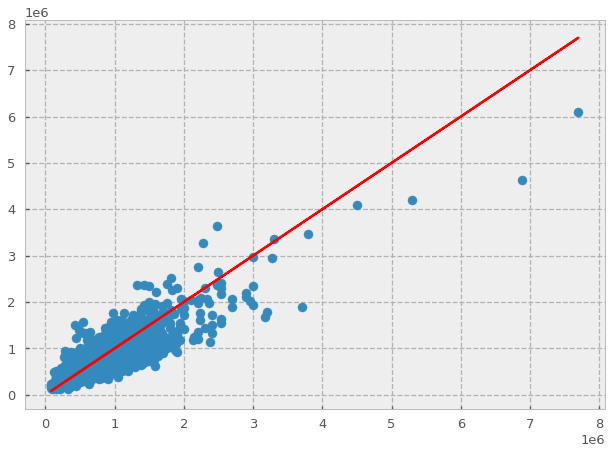

In [69]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, color='r') # model not good at predicting the expensive houses

Might be worth retraining the model without the extremes